#                                             osama ayman

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [99]:
a,b=-1,2
x=np.random.uniform(low=0, high=20, size=200)
y=a*x+b

#### Plot your data points. 

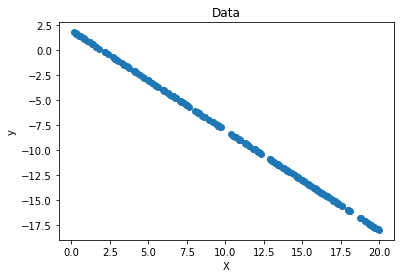

In [100]:
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data')
plt.plot(x,y,'o')

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

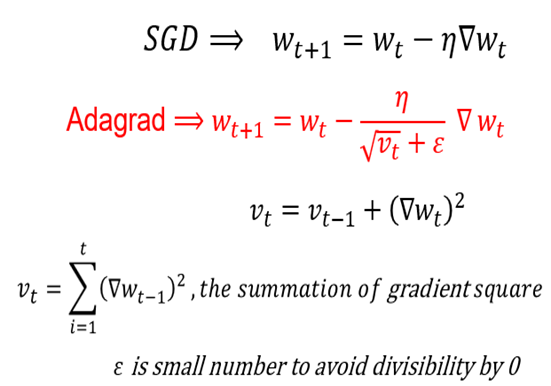

In [101]:
def adaGrad(x,y,alpha,epsilon,epochs):
    theta0=0
    theta1=0
    theta0Hist=[]
    theta1Hist=[]
    lossHist=[]
    hypoHist=[]
    v0=0
    v1=0
    n=len(x)
    for _ in range(epochs):
        theta0Hist.append(theta0)
        theta1Hist.append(theta1)
        hypo=theta0+(theta1*x)
        hypoHist.append(hypo)
        loss=sum((hypo-y)**2)/n
        lossHist.append(loss)
        
        grad0=(1/n)*sum((hypo-y))              
        grad1=(1/n)*(x.T@(hypo-y))
        v0=v0+grad0**2
        v1=v1+grad1**2
        
        adaptive0=alpha/(np.sqrt(v0)+epsilon)
        adaptive1=alpha/(np.sqrt(v1)+epsilon)
        
        theta0=theta0-adaptive0*grad0
        theta1=theta1-adaptive1*grad1
    
    
    
    
    
    
    return np.array(theta0Hist),np.array(theta1Hist),np.array(lossHist),np.array(hypoHist),theta0,theta1

In [102]:
alpha=0.1
epsilon=1e-8
epochs=1000

theta0Hist,theta1Hist,lossHist,hypoHist,theta0,theta1=adaGrad(x,y,alpha,epsilon,epochs)
y_hat=theta0+theta1*x
r2_score(y, y_hat)

0.9902356749050094

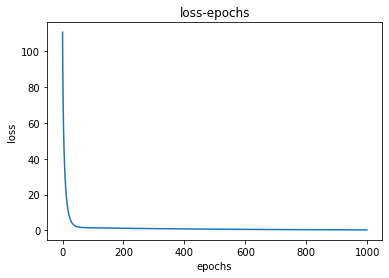

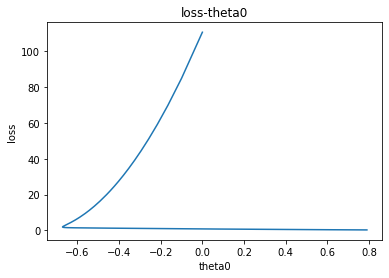

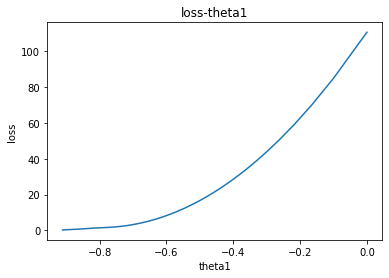

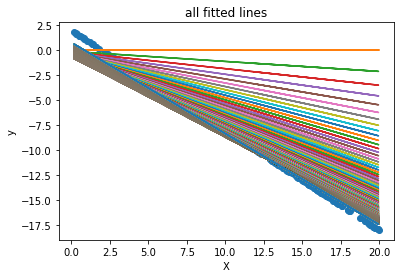

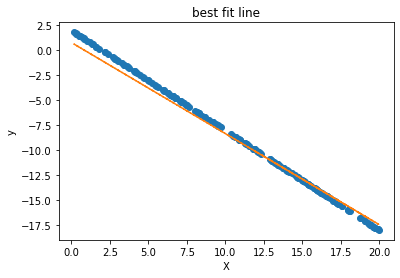

In [103]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss-epochs')
plt.plot(lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta0')
plt.title('loss-theta0')
plt.plot(theta0Hist,lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta1')
plt.title('loss-theta1')
plt.plot(theta1Hist,lossHist)
plt.show()
plt.title('all fitted lines')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,hypoHist.T) #x with every column from h make one line
plt.show()
plt.title('best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,y_hat,'--')
plt.show()

In [110]:
alpha=0.01
epsilon=1e-8
epochs=10000

theta0Hist,theta1Hist,lossHist,hypoHist,theta0,theta1=adaGrad(x,y,alpha,epsilon,epochs)
y_hat=theta0+theta1*x
r2_score(y, y_hat)

0.9570985687836382

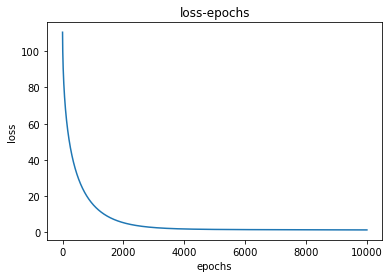

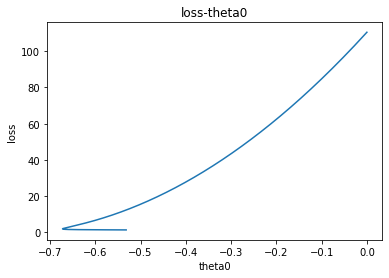

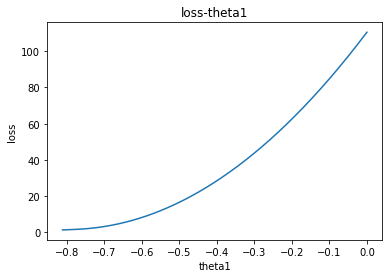

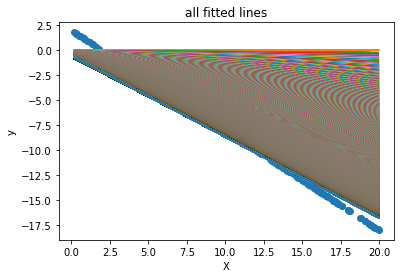

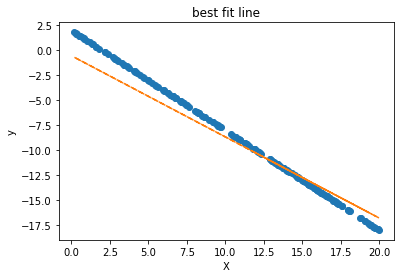

In [111]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss-epochs')
plt.plot(lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta0')
plt.title('loss-theta0')
plt.plot(theta0Hist,lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta1')
plt.title('loss-theta1')
plt.plot(theta1Hist,lossHist)
plt.show()
plt.title('all fitted lines')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,hypoHist.T) #x with every column from h make one line
plt.show()
plt.title('best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,y_hat,'--')
plt.show()

In [137]:
alpha=0.01
epsilon=1e-8
epochs=10000

theta0Hist,theta1Hist,lossHist,hypoHist,theta0,theta1=adaGrad(x,y,alpha,epsilon,epochs)
y_hat=theta0+theta1*x
r2_score(y, y_hat)

0.9570985687836382

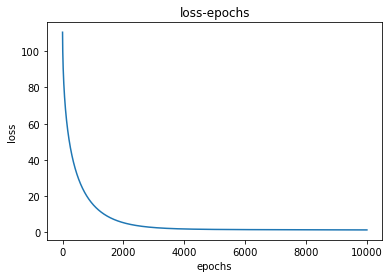

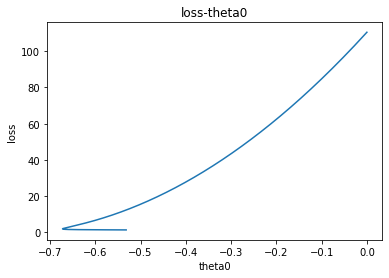

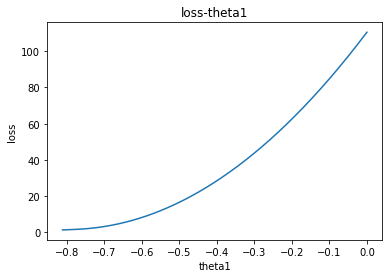

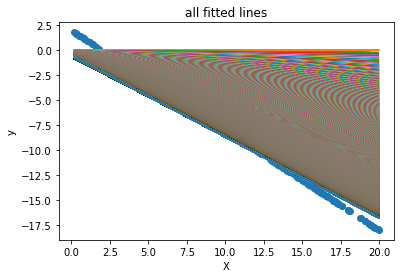

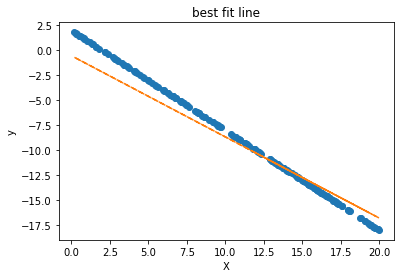

In [138]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss-epochs')
plt.plot(lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta0')
plt.title('loss-theta0')
plt.plot(theta0Hist,lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta1')
plt.title('loss-theta1')
plt.plot(theta1Hist,lossHist)
plt.show()
plt.title('all fitted lines')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,hypoHist.T) #x with every column from h make one line
plt.show()
plt.title('best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,y_hat,'--')
plt.show()

### in adagrad every time alpha is small we need to increase iterations

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

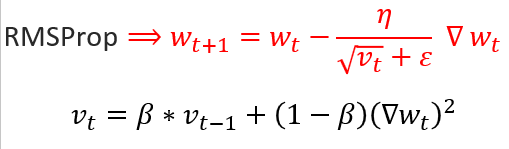

In [113]:
def rmsProp(x,y,alpha,epsilon,peta,epochs):
    theta0=0
    theta1=0
    theta0Hist=[]
    theta1Hist=[]
    lossHist=[]
    hypoHist=[]
    v0=0
    v1=0
    n=len(x)
    for _ in range(epochs):
        theta0Hist.append(theta0)
        theta1Hist.append(theta1)
        hypo=theta0+(theta1*x)
        hypoHist.append(hypo)
        loss=sum((hypo-y)**2)/n
        lossHist.append(loss)
        
        grad0=(1/n)*sum((hypo-y))              
        grad1=(1/n)*(x.T@(hypo-y))
        
        v0=peta*v0+(1-peta)*grad0**2
        v1=peta*v1+(1-peta)*grad1**2
        
        adaptive0=alpha/(np.sqrt(v0)+epsilon)
        adaptive1=alpha/(np.sqrt(v1)+epsilon)
        
        theta0=theta0-adaptive0*grad0
        theta1=theta1-adaptive1*grad1
    
    
    
    
    
    
    return np.array(theta0Hist),np.array(theta1Hist),np.array(lossHist),np.array(hypoHist),theta0,theta1

In [114]:
alpha=0.1
epsilon=1e-8
epochs=1000
peta=0.99
theta0Hist,theta1Hist,lossHist,hypoHist,theta0,theta1=rmsProp(x,y,alpha,epsilon,peta,epochs)
y_hat=theta0+theta1*x
r2_score(y, y_hat)

0.9892243855749909

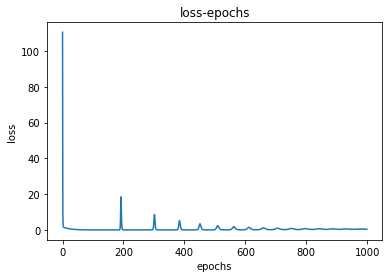

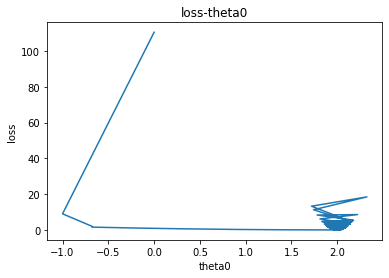

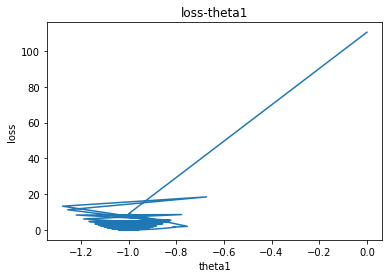

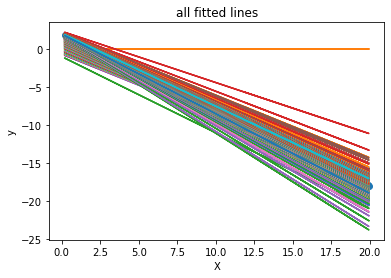

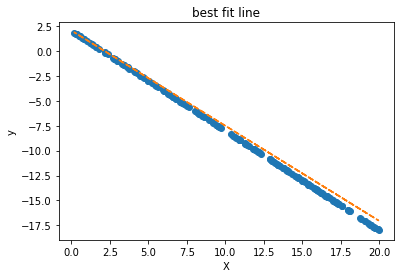

In [115]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss-epochs')
plt.plot(lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta0')
plt.title('loss-theta0')
plt.plot(theta0Hist,lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta1')
plt.title('loss-theta1')
plt.plot(theta1Hist,lossHist)
plt.show()
plt.title('all fitted lines')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,hypoHist.T) #x with every column from h make one line
plt.show()
plt.title('best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,y_hat,'--')
plt.show()

In [139]:
alpha=0.1
epsilon=1e-8
epochs=1000
peta=0.5
theta0Hist,theta1Hist,lossHist,hypoHist,theta0,theta1=rmsProp(x,y,alpha,epsilon,peta,epochs)
y_hat=theta0+theta1*x
r2_score(y, y_hat)

0.9867251935330448

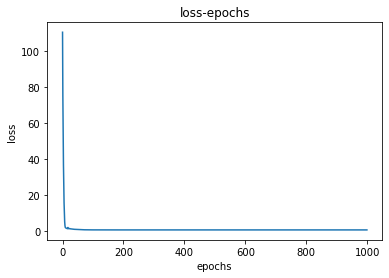

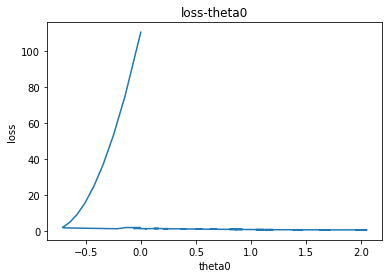

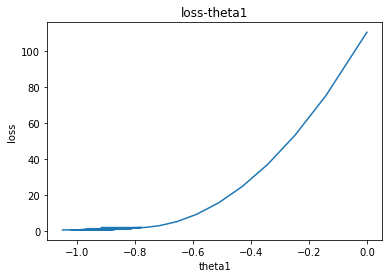

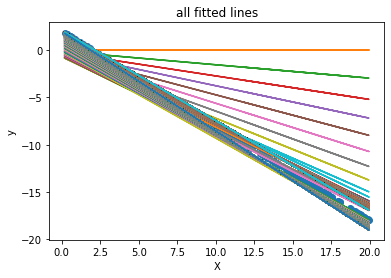

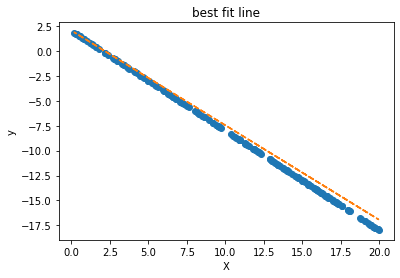

In [140]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss-epochs')
plt.plot(lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta0')
plt.title('loss-theta0')
plt.plot(theta0Hist,lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta1')
plt.title('loss-theta1')
plt.plot(theta1Hist,lossHist)
plt.show()
plt.title('all fitted lines')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,hypoHist.T) #x with every column from h make one line
plt.show()
plt.title('best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,y_hat,'--')
plt.show()

In [118]:
alpha=0.01
epsilon=1e-8
epochs=1000
peta=0.5
theta0Hist,theta1Hist,lossHist,hypoHist,theta0,theta1=rmsProp(x,y,alpha,epsilon,peta,epochs)
y_hat=theta0+theta1*x
r2_score(y, y_hat)

0.9998672519408719

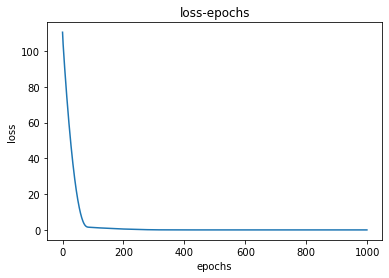

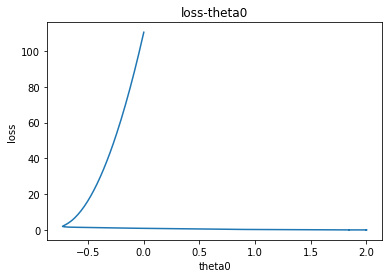

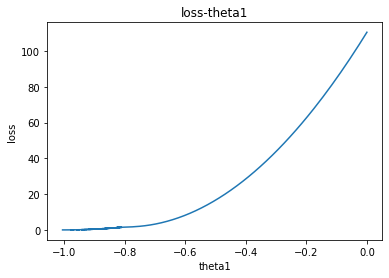

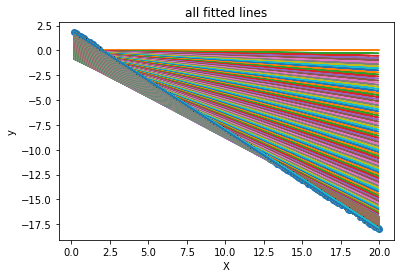

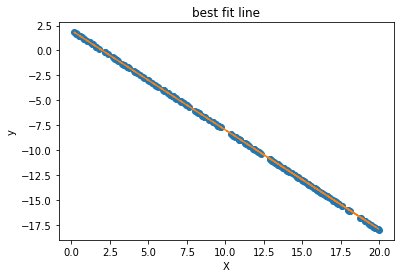

In [119]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss-epochs')
plt.plot(lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta0')
plt.title('loss-theta0')
plt.plot(theta0Hist,lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta1')
plt.title('loss-theta1')
plt.plot(theta1Hist,lossHist)
plt.show()
plt.title('all fitted lines')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,hypoHist.T) #x with every column from h make one line
plt.show()
plt.title('best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,y_hat,'--')
plt.show()

## Compare rmsprop with Adagrad

### rms overshot(isolate) in the minmum rather than adagrad
### acurace for rms better than adagrad with minmum iterations
### rms like adagrad with Exponentially Weighted Moving Average 

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

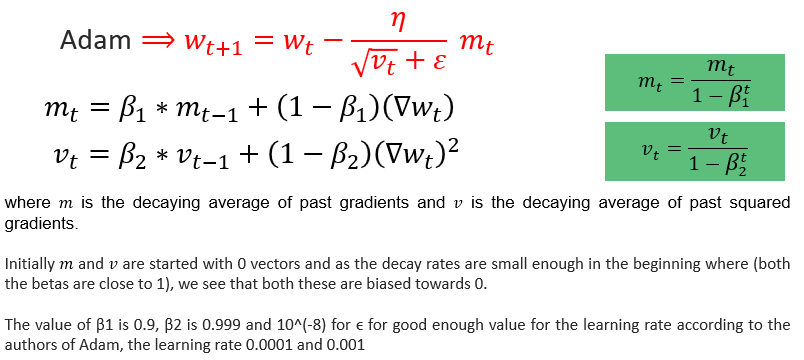

In [120]:
def adam(x,y,alpha,epsilon,peta1,peta2,epochs):
    theta0=0
    theta1=0
    theta0Hist=[]
    theta1Hist=[]
    lossHist=[]
    hypoHist=[]
    v0=0
    v1=0
    m0=0
    m1=0
    n=len(x)
    for i in range(epochs):
        theta0Hist.append(theta0)
        theta1Hist.append(theta1)
        hypo=theta0+(theta1*x)
        hypoHist.append(hypo)
        loss=sum((hypo-y)**2)/n
        lossHist.append(loss)
        
        grad0=(1/n)*sum((hypo-y))              
        grad1=(1/n)*(x.T@(hypo-y))
        
        m0=(peta1*m0)+((1-peta1)*grad0)
        m1=(peta1*m1)+((1-peta1)*grad1)
        v0=(peta2*v0)+((1-peta2)*grad0**2)
        v1=(peta2*v1)+((1-peta2)*grad1**2)
        
        m0=m0/(1-peta1**(i+1))
        v0=v0/(1-peta2**(i+1))
        m1=m1/(1-peta1**(i+1))
        v1=v1/(1-peta2**(i+1))
            
            
        adaptive0=alpha/(np.sqrt(v0)+epsilon)
        adaptive1=alpha/(np.sqrt(v1)+epsilon)
        
        theta0=theta0-adaptive0*grad0
        theta1=theta1-adaptive1*grad1
    
    
    
    
    
    
    return np.array(theta0Hist),np.array(theta1Hist),np.array(lossHist),np.array(hypoHist),theta0,theta1

In [125]:
alpha=0.1
epsilon=1e-8
epochs=10000
peta1=0.99
peta2=0.5
theta0Hist,theta1Hist,lossHist,hypoHist,theta0,theta1=adam(x,y,alpha,epsilon,peta1,peta2,epochs)
y_hat=theta0+theta1*x
r2_score(y, y_hat)

0.9867251935330448

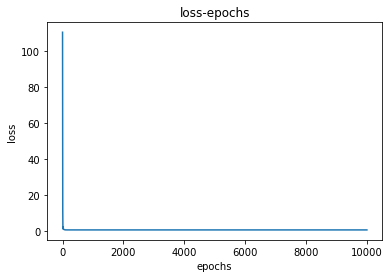

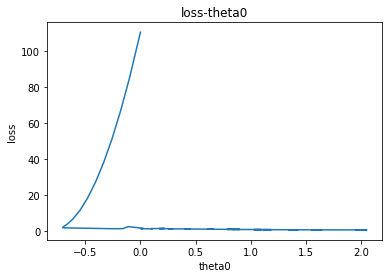

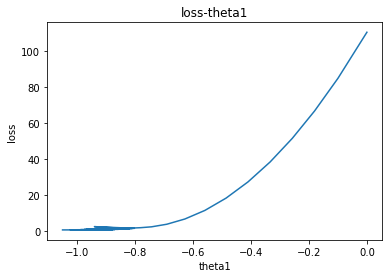

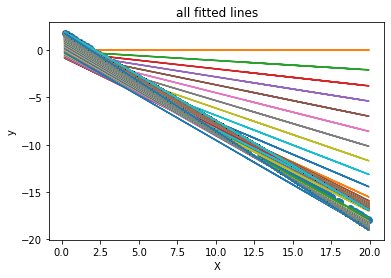

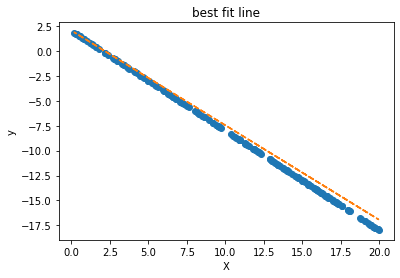

In [126]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss-epochs')
plt.plot(lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta0')
plt.title('loss-theta0')
plt.plot(theta0Hist,lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta1')
plt.title('loss-theta1')
plt.plot(theta1Hist,lossHist)
plt.show()
plt.title('all fitted lines')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,hypoHist.T) #x with every column from h make one line
plt.show()
plt.title('best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,y_hat,'--')
plt.show()

In [147]:
alpha=0.01
epsilon=1e-8
epochs=100
peta1=0.9
peta2=0.1
theta0Hist,theta1Hist,lossHist,hypoHist,theta0,theta1=adam(x,y,alpha,epsilon,peta1,peta2,epochs)
y_hat=theta0+theta1*x
r2_score(y, y_hat)


0.9581597672440447

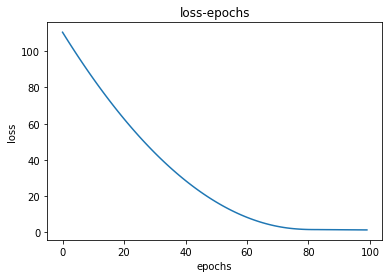

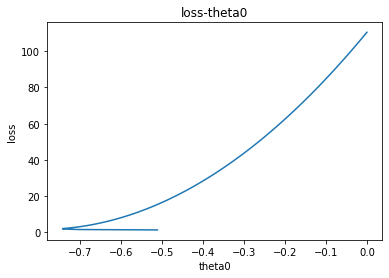

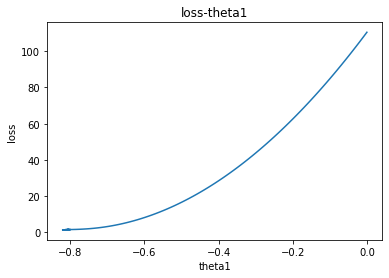

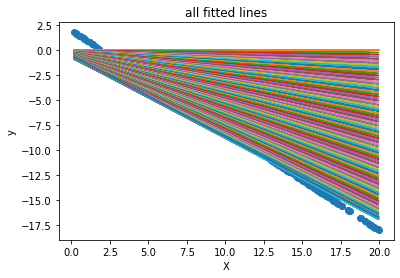

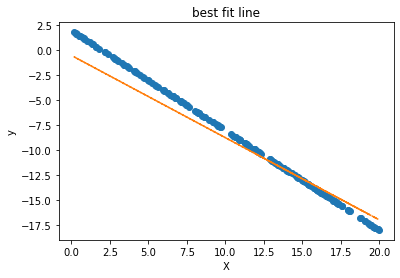

In [148]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss-epochs')
plt.plot(lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta0')
plt.title('loss-theta0')
plt.plot(theta0Hist,lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta1')
plt.title('loss-theta1')
plt.plot(theta1Hist,lossHist)
plt.show()
plt.title('all fitted lines')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,hypoHist.T) #x with every column from h make one line
plt.show()
plt.title('best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,y_hat,'--')
plt.show()

In [149]:
alpha=0.01
epsilon=1e-8
epochs=1000
peta1=0.8
peta2=0.9
theta0Hist,theta1Hist,lossHist,hypoHist,theta0,theta1=adam(x,y,alpha,epsilon,peta1,peta2,epochs)
y_hat=theta0+theta1*x
r2_score(y, y_hat)

0.9998672519408719

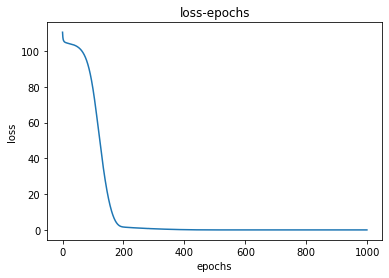

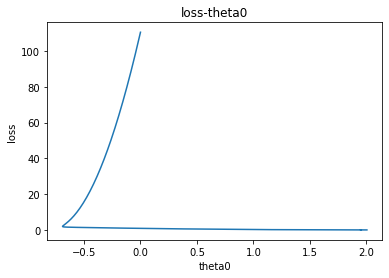

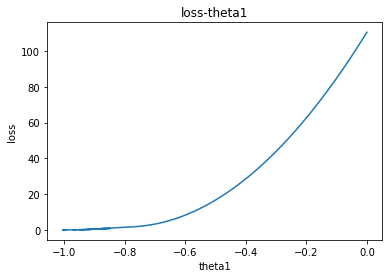

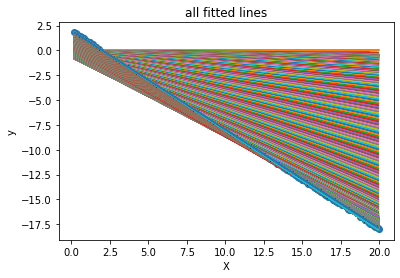

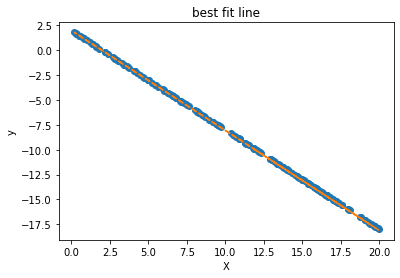

In [150]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss-epochs')
plt.plot(lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta0')
plt.title('loss-theta0')
plt.plot(theta0Hist,lossHist)
plt.show()
plt.ylabel('loss')
plt.xlabel('theta1')
plt.title('loss-theta1')
plt.plot(theta1Hist,lossHist)
plt.show()
plt.title('all fitted lines')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,hypoHist.T) #x with every column from h make one line
plt.show()
plt.title('best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x,y,'o')
plt.plot(x,y_hat,'--')
plt.show()

## Compare with Adagrad and RMSProp
### in adam when alpha small we need few epochs
### adam consider like RMS with momuntum 
### adam add momuntum with Exponentially Weighted Moving Average

## Congratulations 
![image.png](attachment:image.png)